<a href="https://colab.research.google.com/github/SriLaxmi1993/Data-Science-projects/blob/main/Marketing_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Scenario: ‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.

Problem Objective: As a data scientist, you should perform exploratory data analysis and hypothesis testing. The goal is to gain a better understanding of the various factors that contribute to customer acquisition.

Data Description:
The variables birth-year, education, income, and so on are related to the first 'P' or 'People' in the tabular data provided to the user. The amount spent on wine, fruits, gold, etc., is related to ‘Product’. The information pertinent to sales channels, like websites, stores, etc., is related to ‘Place’, and the fields which talk about promotions and results of different campaigns are related to ‘Promotion’

# Data Wrangling


In [ ]:
import pandas as pd

#load the data
df = pd.read_csv('marketing_data.csv')


#load first five rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
# Investigating 'Dt_Customer' and 'Income' columns

# Converting 'Dt_Customer' to datetime format and checking if conversion is successful
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Cleaning and converting 'Income' to a numeric format
# Removing '$' and ',' from the 'Income' column and converting it to float
df[' Income '] = df[' Income '].replace('[\$,]', '', regex=True).astype(float)

# Checking for successful conversion and for missing values in these columns
dt_customer_conversion_success = df['Dt_Customer'].dtype == 'datetime64[ns]'
income_conversion_success = df[' Income '].dtype == 'float'
missing_values = df[['Dt_Customer',' Income ']].isnull().sum()

dt_customer_conversion_success, income_conversion_success, missing_values

(True,
 True,
 Dt_Customer     0
  Income        24
 dtype: int64)

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [ ]:
# Examining unique values in 'Education' and 'Marital_Status' columns
unique_education = df['Education'].unique()
unique_marital_status = df['Marital_Status'].unique()

unique_education, unique_marital_status

(array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object),
 array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
        'Alone', 'Absurd'], dtype=object))

In [ ]:
# Cleaning 'Marital_Status' column by grouping unconventional statuses into broader categories
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'YOLO'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd'], 'Other')

# Rechecking the unique values in 'Marital_Status' after cleaning
unique_marital_status_cleaned = df['Marital_Status'].unique()

print(unique_marital_status_cleaned)


['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Other']


In [ ]:
# Imputing missing values in 'Income'
# Grouping by 'Education' and 'Marital_Status' and calculating the mean income
mean_income_by_group = df.groupby(['Education', 'Marital_Status'])[' Income '].mean()

print(mean_income_by_group)

In [ ]:
# Filling missing 'Income' values with the mean income of their respective group
df[' Income '] = df.apply(
    lambda row: mean_income_by_group[row['Education'], row['Marital_Status']] if pd.isnull(row[' Income ']) else row[' Income '],
    axis=1
)

# Checking if there are any missing values left in 'Income'
missing_values_income_after_imputation = df[' Income '].isnull().sum()

unique_marital_status_cleaned, mean_income_by_group, missing_values_income_after_imputation

(array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'Other'],
       dtype=object),
 Education   Marital_Status
 2n Cycle    Divorced          49395.130435
             Married           46201.100000
             Single            53673.944444
             Together          44736.410714
             Widow             51392.200000
 Basic       Divorced           9548.000000
             Married           21960.500000
             Single            18238.666667
             Together          21240.071429
             Widow             22123.000000
 Graduation  Divorced          54526.042017
             Married           50800.258741
             Other             79244.000000
             Single            51252.765182
             Together          55758.480702
             Widow             54976.657143
 Master      Divorced          50331.945946
             Married           53286.028986
             Other             65487.000000
             Single            53633.19736

In [ ]:
# Creating new variables

# 1. Total Number of Children: Sum of 'Kidhome' and 'Teenhome'
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# 2. Age: Calculated from 'Year_Birth'
# Assuming the current year is 2024 as per the conversation date
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

# 3. Total Spending: Sum of spending on various platforms
spending_columns = ['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases']
df['Total_Spending'] = df[spending_columns].sum(axis=1)

# Displaying the first few rows with the new variables
df[['Total_Children', 'Age', 'Total_Spending']].head()

,Total_Children,Age,Total_Spending
0,0,54,14
1,0,63,17
2,1,66,10
3,2,57,3
4,1,35,6


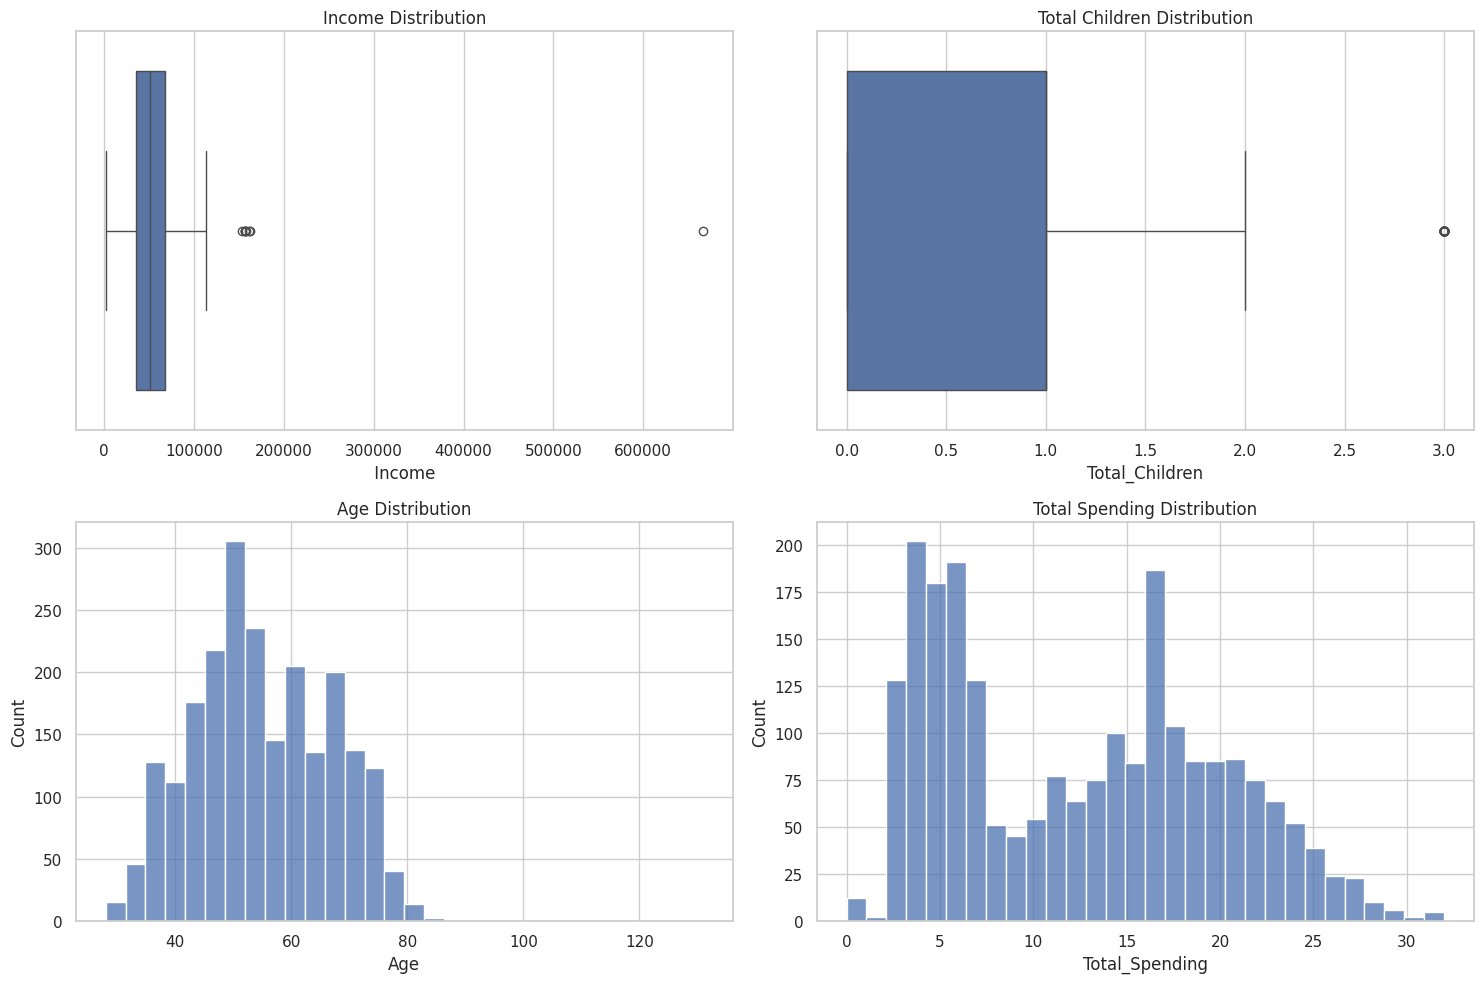

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot style
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plots
sns.boxplot(data=df, x=' Income ', ax=axes[0, 0])
sns.boxplot(data=df, x='Total_Children', ax=axes[0, 1])

# Histograms
sns.histplot(data=df, x='Age', bins=30, ax=axes[1, 0])
sns.histplot(data=df, x='Total_Spending', bins=30, ax=axes[1, 1])


# Setting titles
axes[0, 0].set_title('Income Distribution')
axes[0, 1].set_title('Total Children Distribution')
axes[1, 0].set_title('Age Distribution')
axes[1, 1].set_title('Total Spending Distribution')

plt.tight_layout()
plt.show()

**The visual analysis provides the following insights:**



Income Distribution: The box plot for Income shows some outliers, particularly in the higher income range.

Total Children Distribution: Most customers have 0 to 2 children, with a few outliers having more.

Age Distribution: The histogram for Age indicates a relatively normal distribution, with most customers aged between 30 and 60 years.

Total Spending Distribution: This histogram shows a right-skewed distribution with some customers having very high total spending, indicating potential outliers.


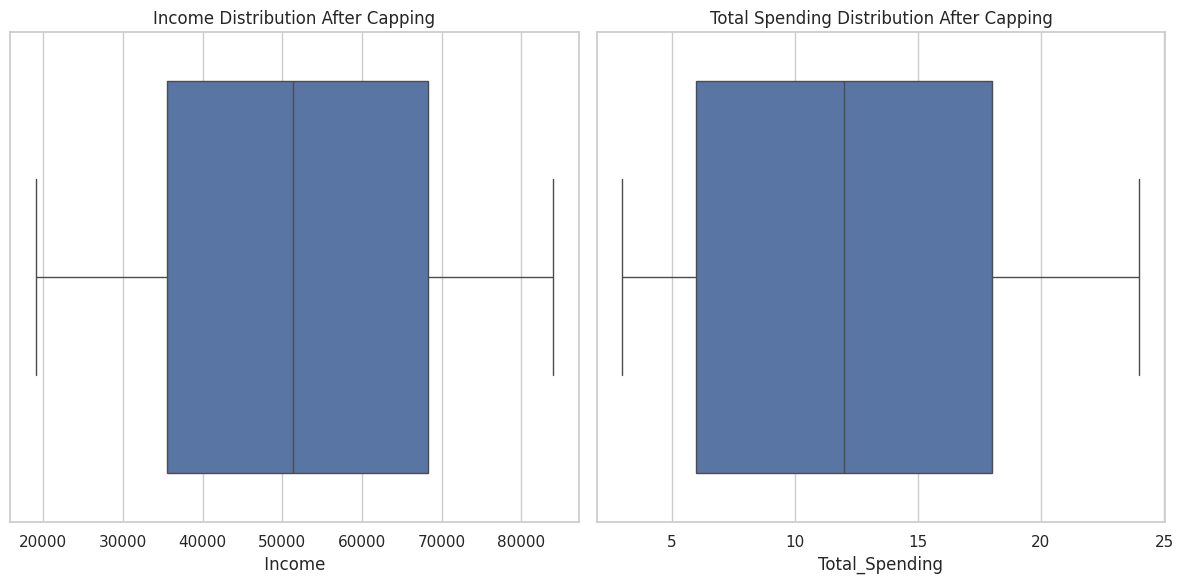

In [ ]:
# Outlier treatment by capping

# Defining the percentiles for capping
upper_percentile = 0.95
lower_percentile = 0.05

# Capping the 'Income'
income_upper_limit = df[' Income '].quantile(upper_percentile)
income_lower_limit = df[' Income '].quantile(lower_percentile)
df[' Income '] = df[' Income '].clip(lower=income_lower_limit, upper=income_upper_limit)

# Capping the 'Total_Spending'
spending_upper_limit = df['Total_Spending'].quantile(upper_percentile)
spending_lower_limit = df['Total_Spending'].quantile(lower_percentile)
df['Total_Spending'] = df['Total_Spending'].clip(lower=spending_lower_limit, upper=spending_upper_limit)

# Rechecking the box plots for 'Income' and 'Total_Spending' after capping
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, x=' Income ', ax=axes[0])
sns.boxplot(data=df, x='Total_Spending', ax=axes[1])
axes[0].set_title('Income Distribution After Capping')
axes[1].set_title('Total Spending Distribution After Capping')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Ordinal encoding for 'Education'
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']  # Assuming an order for education levels
ordinal_encoder = OrdinalEncoder(categories=[education_order])
df['Education_Ordinal'] = ordinal_encoder.fit_transform(df[['Education']])

# One-hot encoding for 'Marital_Status'
onehot_encoder = OneHotEncoder(drop='first', sparse=False)  # Dropping the first category to avoid multicollinearity
marital_status_encoded = onehot_encoder.fit_transform(df[['Marital_Status']])
marital_status_encoded_df = pd.DataFrame(marital_status_encoded, columns=onehot_encoder.get_feature_names_out(['Marital_Status']))

# Adding the one-hot encoded columns to the original dataframe
data_encoded = pd.concat([df, marital_status_encoded_df], axis=1)

# Displaying a portion of the new dataframe with encoded variables
data_encoded[['Education', 'Education_Ordinal'] + marital_status_encoded_df.columns.tolist()].head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Education,Education_Ordinal,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,Graduation,2.0,0.0,0.0,0.0,0.0,0.0
1,Graduation,2.0,0.0,0.0,1.0,0.0,0.0
2,Graduation,2.0,1.0,0.0,0.0,0.0,0.0
3,Graduation,2.0,0.0,0.0,0.0,1.0,0.0
4,Graduation,2.0,0.0,0.0,1.0,0.0,0.0
